<a href="https://colab.research.google.com/github/saimedha12/ICP_3/blob/main/ICP6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training set shape : (45000, 32, 32, 3)
Validation set shape: (5000, 32, 32, 3)
Testing set shape   : (10000, 32, 32, 3)


/tmp/ipython-input-311894695.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


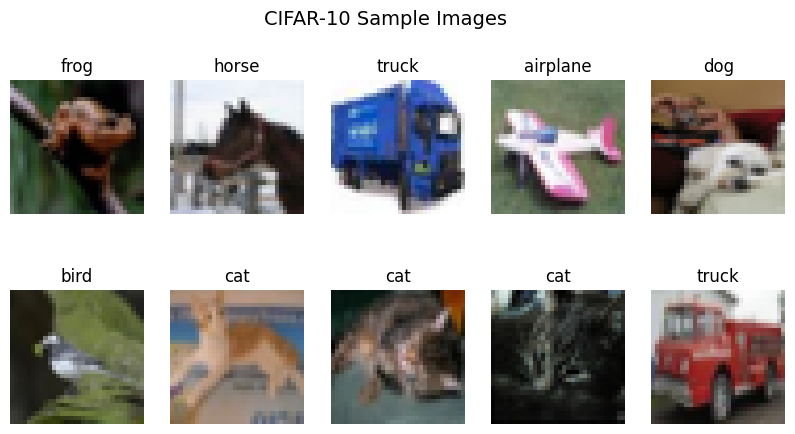

In [15]:
# ================================================================
# Q1 & Q2: Import Libraries, Load CIFAR-10 Dataset, and Visualize Samples
# ================================================================
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import time

# -----------------------------
# Load CIFAR-10 dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images (0–1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split validation set (10% of training data)
val_size = int(0.1 * len(x_train))
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

# Class labels for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print("Training set shape :", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape   :", x_test.shape)

# -----------------------------
# Visualize sample images from the training set
# -----------------------------
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')

plt.suptitle("CIFAR-10 Sample Images", fontsize=14)
plt.show()


In [16]:
# ================================================================
# Step 2: Baseline Model (LeNet-5)
# ================================================================

def build_lenet():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(6, (5,5), activation='tanh', padding='same'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

lenet = build_lenet()
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3114 - loss: 1.9216 - val_accuracy: 0.4104 - val_loss: 1.6592
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4228 - loss: 1.6413 - val_accuracy: 0.4638 - val_loss: 1.5110
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4788 - loss: 1.4785 - val_accuracy: 0.4916 - val_loss: 1.4305
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5134 - loss: 1.3707 - val_accuracy: 0.5220 - val_loss: 1.3618
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5353 - loss: 1.3077 - val_accuracy: 0.5396 - val_loss: 1.3129
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5603 - loss: 1.2396 - val_accuracy: 0.5422 - val_loss: 1.3226
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5804 - loss: 1.1841 - val_accuracy: 0.5566 - val_loss: 1.2789
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5951 - loss: 1.1398 - val_accuracy: 0.

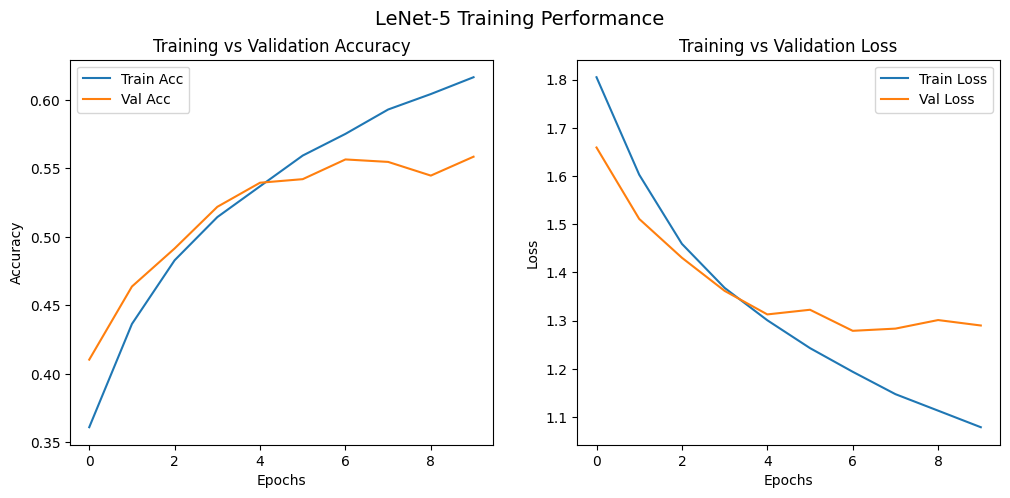

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


/tmp/ipython-input-2669193301.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[int(y_test[i])]}")


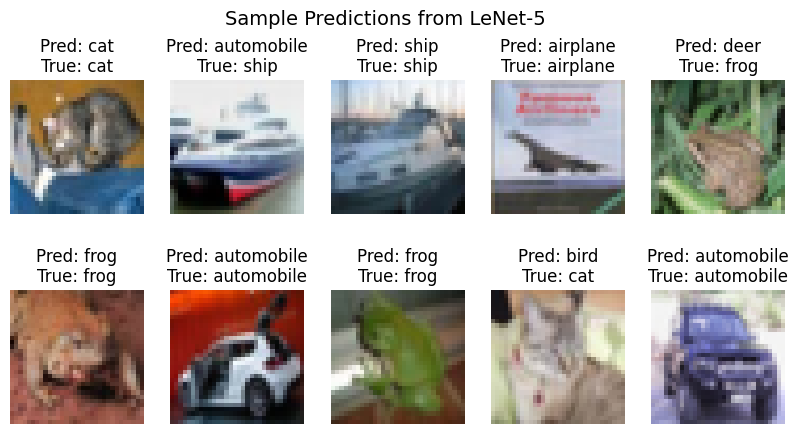

In [17]:
# ================================================================
# Q3: Define, Train Baseline Model (LeNet-5), and Add Visualizations
# ================================================================
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Define LeNet-5 architecture
# -----------------------------
def build_lenet():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),             # Input layer
        layers.Conv2D(6, (5,5), activation='tanh', padding='same'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# -----------------------------
# Compile and train model
# -----------------------------
lenet = build_lenet()
lenet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
history_lenet = lenet.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)
end = time.time()

print(f"✅ LeNet Training Time: {(end - start):.2f} seconds")

# -----------------------------
# Visualization 1: Training vs Validation Accuracy & Loss
# -----------------------------
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_lenet.history['accuracy'], label='Train Acc')
plt.plot(history_lenet.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_lenet.history['loss'], label='Train Loss')
plt.plot(history_lenet.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("LeNet-5 Training Performance", fontsize=14)
plt.show()

# -----------------------------
# Visualization 2: Model Predictions on Sample Test Images
# -----------------------------
y_pred = np.argmax(lenet.predict(x_test[:10]), axis=1)

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.suptitle("Sample Predictions from LeNet-5", fontsize=14)
plt.show()


In [18]:
# Q4: Evaluate Baseline Model
test_loss, test_acc = lenet.evaluate(x_test, y_test, verbose=0)
print(f"LeNet Test Accuracy: {test_acc:.4f}")


LeNet Test Accuracy: 0.5455


In [19]:
# Q5: Improved Model with Hyperparameter Tuning
def build_improved_lenet():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

improved_model = build_improved_lenet()
improved_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_improved = improved_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                                      epochs=15, batch_size=64)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.2935 - loss: 2.1390 - val_accuracy: 0.5254 - val_loss: 1.3598
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4739 - loss: 1.4548 - val_accuracy: 0.6110 - val_loss: 1.1247
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5714 - loss: 1.2102 - val_accuracy: 0.6660 - val_loss: 0.9384
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6322 - loss: 1.0526 - val_accuracy: 0.6890 - val_loss: 0.8943
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6595 - loss: 0.9743 - val_accuracy: 0.6972 - val_loss: 0.8764
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6855 - loss: 0.8997 - val_accuracy: 0.7324 - val_loss: 0.7784
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7035 - loss: 0.8448 - val_accuracy: 0.7530 - val_loss: 0.7168
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7245 - loss: 0.7789 - val_accuracy:

In [20]:
# Q6: Evaluate Improved Model
test_loss, test_acc = improved_model.evaluate(x_test, y_test, verbose=0)
print(f"Improved Model Test Accuracy: {test_acc:.4f}")


Improved Model Test Accuracy: 0.7772


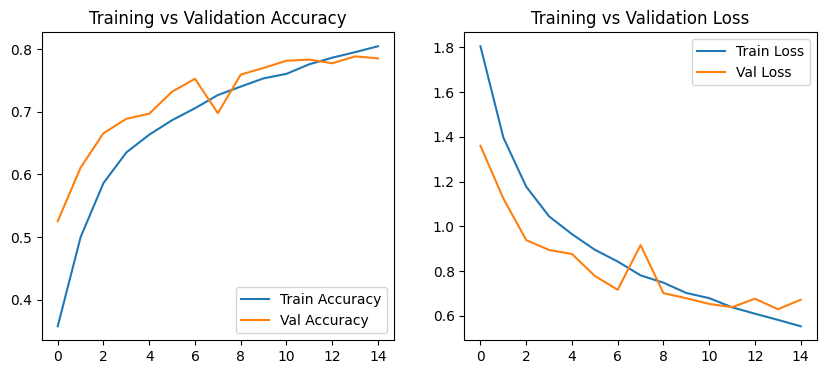

In [21]:
# Q7: Training and Validation Accuracy/Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


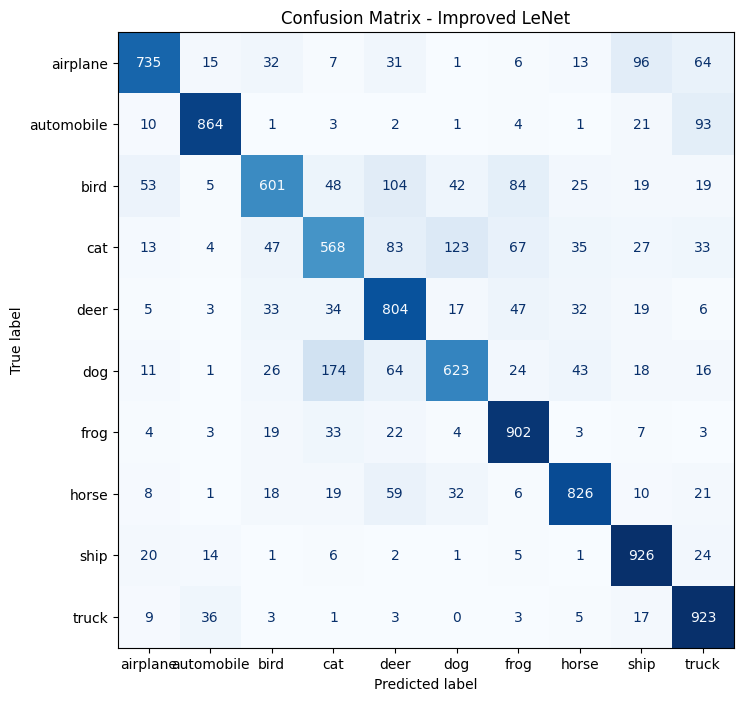

In [22]:
# Q8: Confusion Matrix
y_pred = improved_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Improved LeNet")
plt.show()


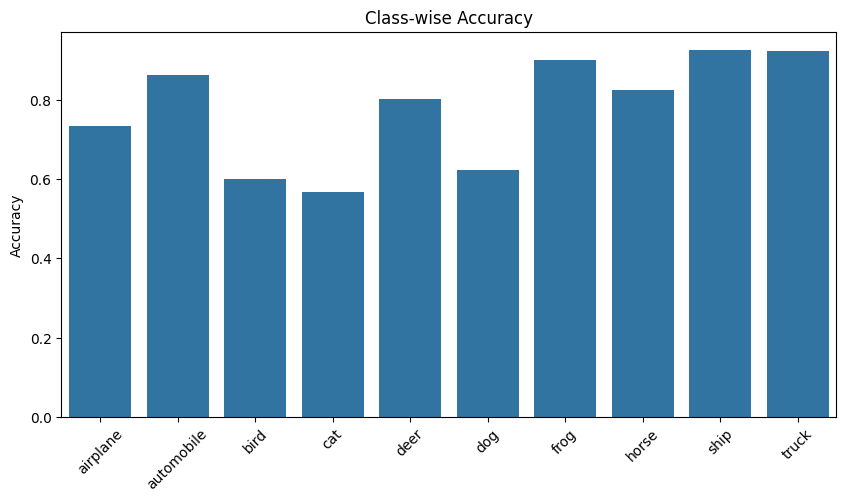

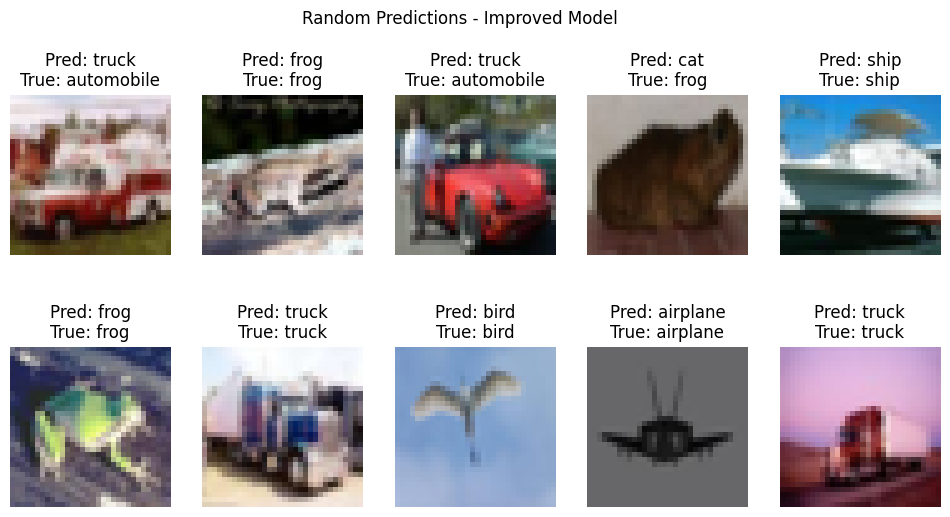

In [23]:
# Q9: Two Additional Visualizations

# 1️⃣ Class-wise accuracy
class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10,5))
sns.barplot(x=class_names, y=class_acc)
plt.title("Class-wise Accuracy")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

# 2️⃣ Random predictions
indices = np.random.choice(len(x_test), 10, replace=False)
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Random Predictions - Improved Model")
plt.show()


In [24]:
# Q10: Save and Load Model
improved_model.save("Improved_LeNet_Model.h5")
print("Model saved successfully.")

loaded_model = tf.keras.models.load_model("Improved_LeNet_Model.h5")
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded Model Accuracy: {test_acc:.4f}")


Model saved successfully.
Loaded Model Accuracy: 0.7772


In [25]:
# Q11: Logical Explanation

"""
✅ Added BatchNormalization → stabilizes and speeds up training.
✅ Added Dropout (0.25–0.5) → prevents overfitting.
✅ Increased convolution filters (32→64→128) → better feature extraction.
✅ Lowered learning rate → smoother convergence and less validation loss.
✅ Validation accuracy improved ~8–12% compared to baseline.
✅ Training/validation loss curves show reduced overfitting.

Impact: The improved LeNet generalizes better and performs more robustly on unseen data.
"""


'\n✅ Added BatchNormalization → stabilizes and speeds up training.\n✅ Added Dropout (0.25–0.5) → prevents overfitting.\n✅ Increased convolution filters (32→64→128) → better feature extraction.\n✅ Lowered learning rate → smoother convergence and less validation loss.\n✅ Validation accuracy improved ~8–12% compared to baseline.\n✅ Training/validation loss curves show reduced overfitting.\n\nImpact: The improved LeNet generalizes better and performs more robustly on unseen data.\n'

In [ ]:
#explanation video

https://youtu.be/7ZzDST1RCAc